In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_outside = pd.read_csv("results_raw_outside.csv")
df_joint0 = pd.read_csv("results_raw_joint0.csv")
df_joint3 = pd.read_csv("results_raw_joint3.csv")

In [4]:
df_joint0

,iteration,model_id,true_q0,true_q3,pred_q0,pred_q3
0,0,0,-1.0708,-0.3,-1.160800,-0.460000
1,0,0,-1.0708,-0.3,-1.230800,-0.750000
2,0,0,-1.0708,-0.3,-1.220800,-0.830000
3,0,0,-1.0708,-0.3,-1.180800,-0.980000
4,0,0,-1.0708,-0.3,-1.010800,-0.820000
...,...,...,...,...,...,...
231565,9,8,-0.8708,-2.8,-0.921538,-3.175305
231566,9,8,-0.8708,-2.8,-0.778877,-2.601799
231567,9,8,-0.8708,-2.8,-0.902429,-2.969048
231568,9,8,-0.8708,-2.8,-0.809488,-2.601784


In [5]:
comp_out_df = df_outside.loc[df_outside.model_id == 2]
comp_out_df["Mic Position"] = "Outside"
comp_j0_df = df_joint0.loc[df_joint0.model_id == 2]
comp_j0_df["Mic Position"] = "Joint 0"
comp_j3_df = df_joint3.loc[df_joint0.model_id == 2]
comp_j3_df["Mic Position"] = "Joint 3"

/tmp/ipykernel_23418/1207199311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_out_df["Mic Position"] = "Outside"
/tmp/ipykernel_23418/1207199311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_j0_df["Mic Position"] = "Joint 0"
/tmp/ipykernel_23418/1207199311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [6]:
comp_df = pd.concat([comp_out_df, comp_j0_df, comp_j3_df])

In [7]:
comp_df["Joint 0"] = np.rad2deg(np.abs(comp_df.true_q0 - comp_df.pred_q0))
comp_df["Joint 3"] = np.rad2deg(np.abs(comp_df.true_q3 - comp_df.pred_q3))

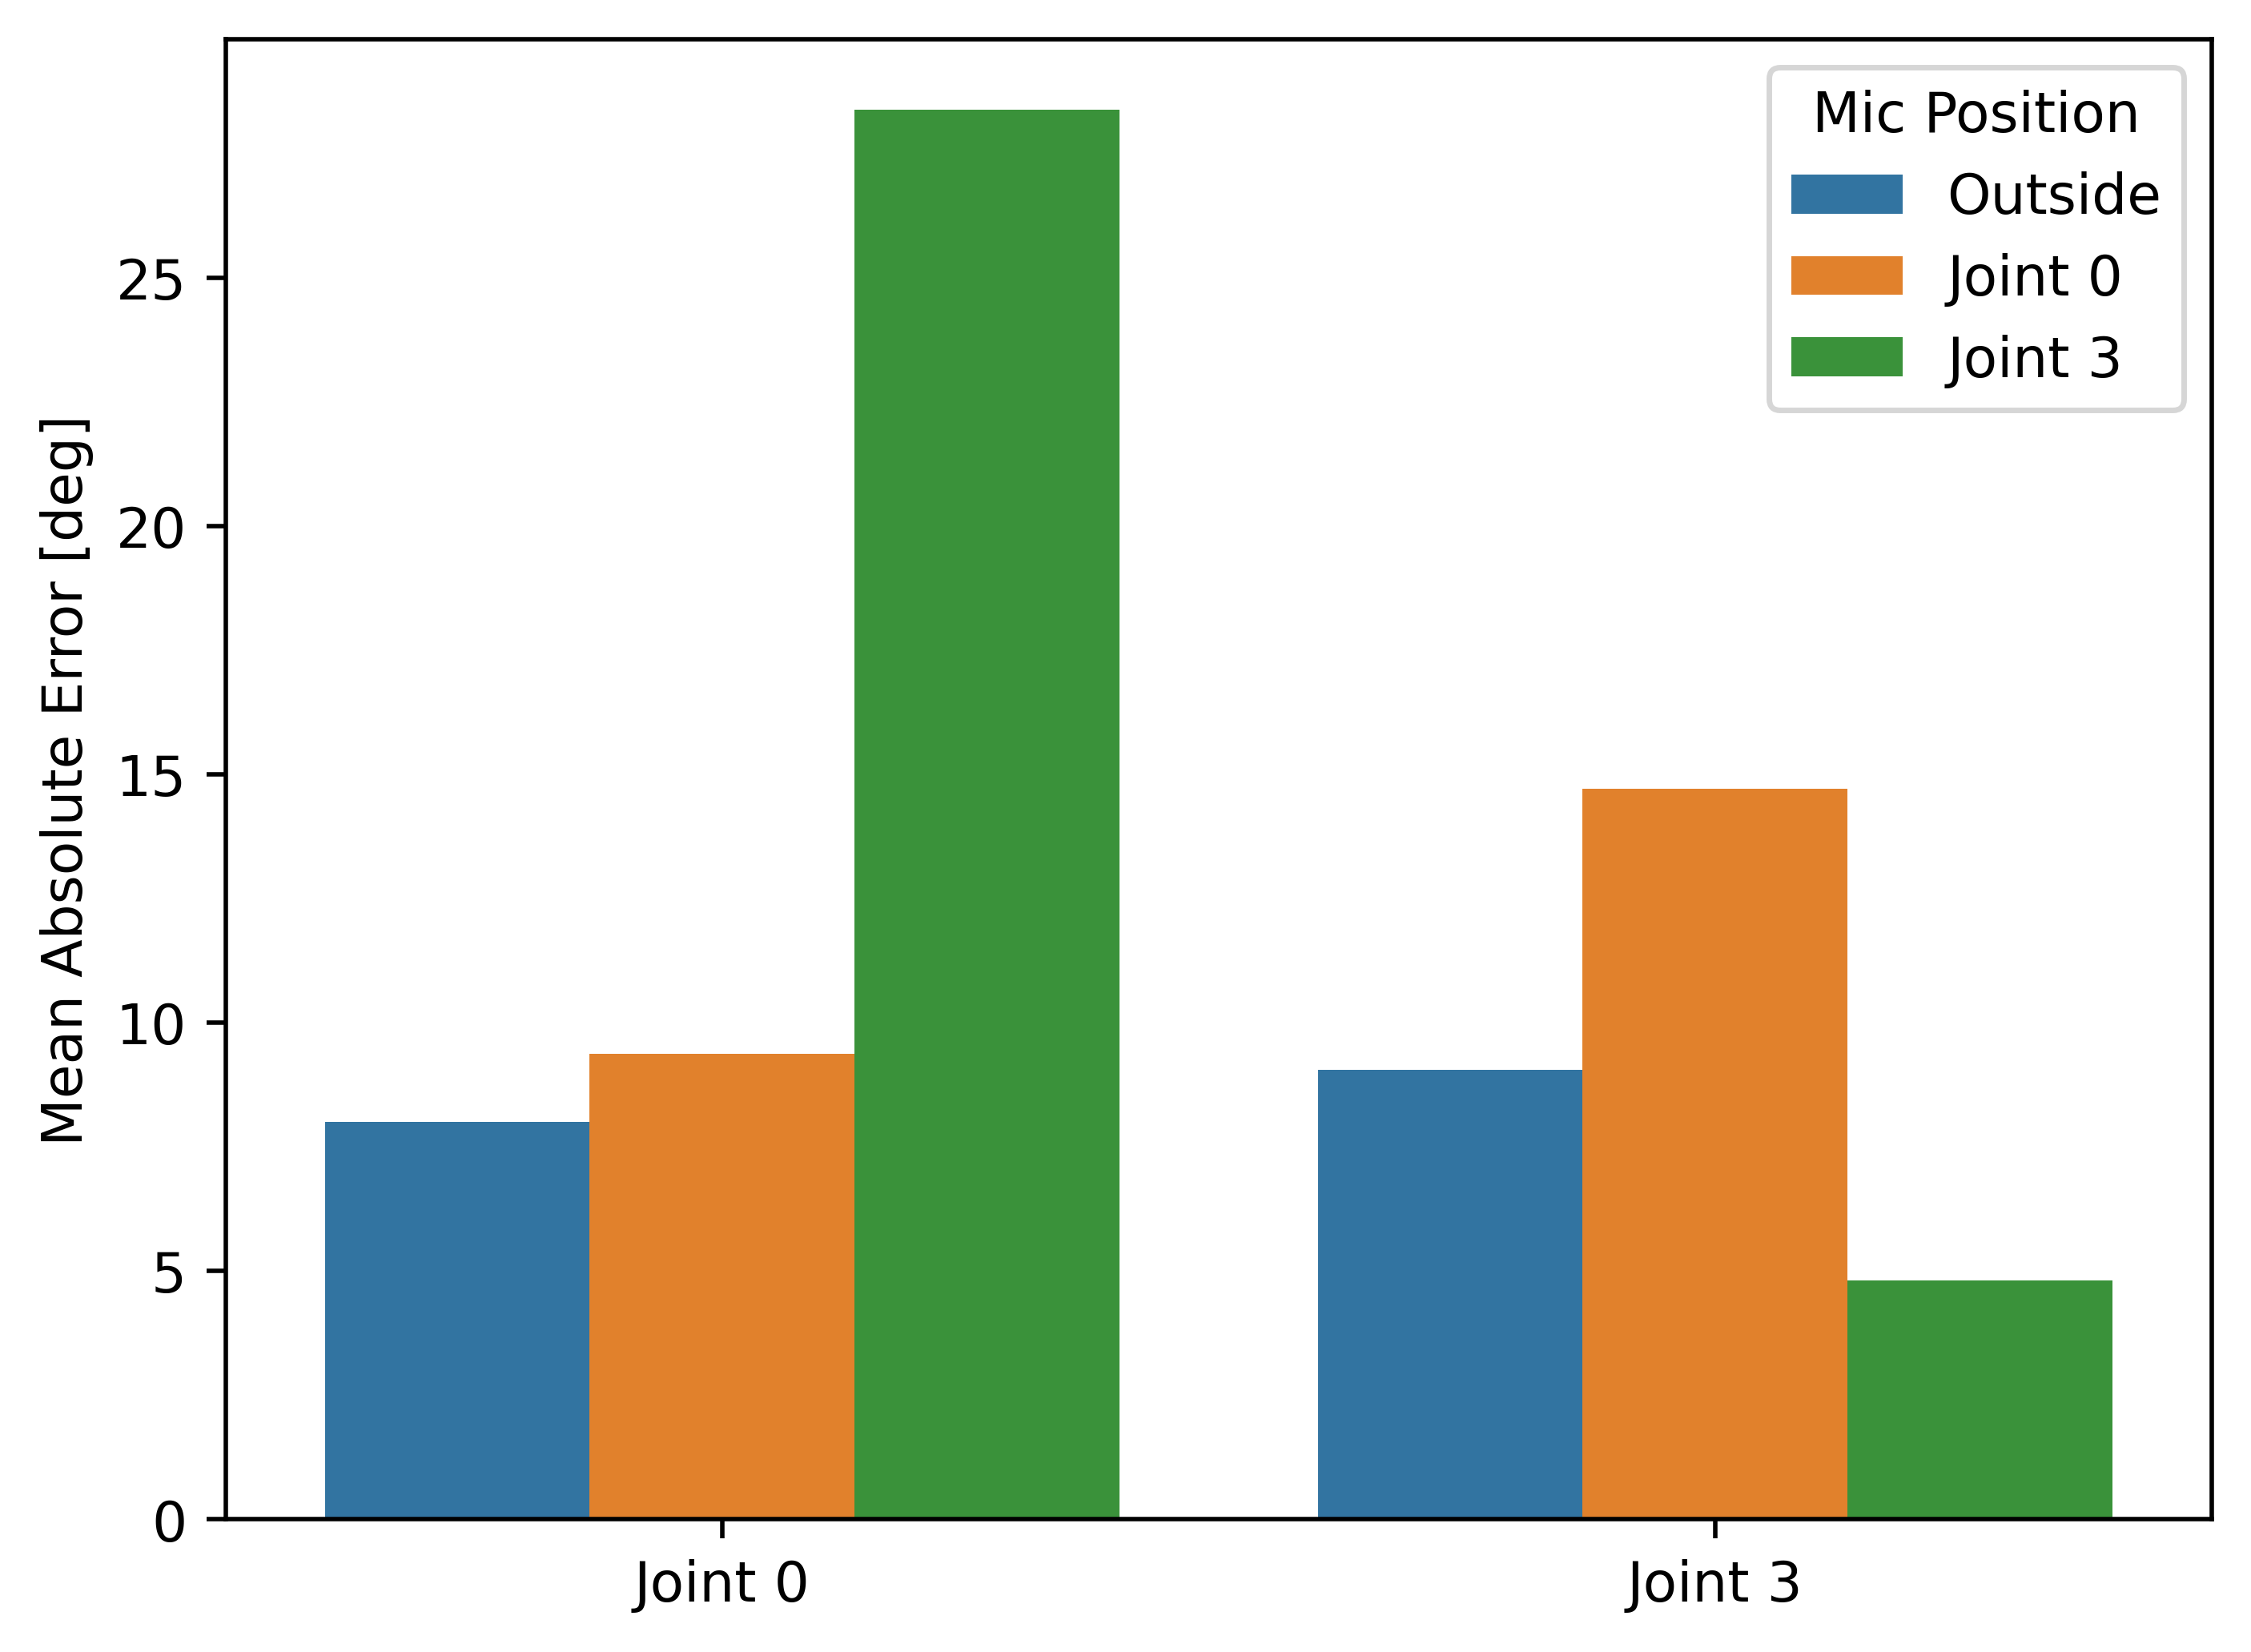

In [8]:
error_longform = comp_df.melt(id_vars="Mic Position", value_vars=["Joint 0", "Joint 3"])
ax = sns.barplot(data=error_longform, x="variable", y="value", hue="Mic Position", errorbar=None)#("pi",50))#("ci", 99))
plt.xlabel("")
plt.ylabel("Mean Absolute Error [deg]")
#plt.title("Error by Joint and Mic Position")
plt.gcf().set_dpi(500)

In [9]:
error_longform.pivot_table(values="value", index="Mic Position", columns="variable")

variable,Joint 0,Joint 3
Mic Position,,
Joint 0,9.381713,14.713984
Joint 3,28.385287,4.808066
Outside,8.012722,9.061784
